In [1]:
import requests
import json
import http.client
from api_key_p3 import API_KEY

headers = {'x-api-key': API_KEY }
CACHE_FILENAME = "cat_cache.json"

In [25]:
headers = {'x-api-key': API_KEY }
conn = http.client.HTTPSConnection("api.thecatapi.com")
conn.request("GET", "/v1/breeds", headers=headers)
res = conn.getresponse()
data = res.read().decode("utf-8")
data_dict = json.loads(data)

In [3]:
breeds_dict = {}
for i in data_dict:
    breeds_dict[i['name']] = i['id']


In [4]:
data_dict[0].keys()

dict_keys(['weight', 'id', 'name', 'cfa_url', 'vetstreet_url', 'vcahospitals_url', 'temperament', 'origin', 'country_codes', 'country_code', 'description', 'life_span', 'indoor', 'lap', 'alt_names', 'adaptability', 'affection_level', 'child_friendly', 'dog_friendly', 'energy_level', 'grooming', 'health_issues', 'intelligence', 'shedding_level', 'social_needs', 'stranger_friendly', 'vocalisation', 'experimental', 'hairless', 'natural', 'rare', 'rex', 'suppressed_tail', 'short_legs', 'wikipedia_url', 'hypoallergenic', 'reference_image_id', 'image'])

In [5]:
import sqlite3


In [16]:
def construct_cache_key(base_url, request_url):
    combine_url = base_url + request_url
    return combine_url

def open_cache():
    try:
        cache_file = open(CACHE_FILENAME, 'r')
        cache_contents = cache_file.read()
        cache_dict = json.loads(cache_contents)
        cache_file.close()
    except:
        cache_dict = {}
    return cache_dict

def save_cache(cache_dict):
    dumped_json_cache = json.dumps(cache_dict)
    fw = open(CACHE_FILENAME,"w")
    fw.write(dumped_json_cache)
    fw.close() 


In [23]:
def get_data(base_url, request_url):
    CACHE_DICT = open_cache()
    cache_key = construct_cache_key(base_url, request_url)
    data_dict = None
    if cache_key in CACHE_DICT.keys():
        data_dict = json.loads(CACHE_DICT[cache_key])
        print("using cache")
    else:
        headers = {'x-api-key': API_KEY }
        conn = http.client.HTTPSConnection(base_url)
        conn.request("GET", request_url, headers=headers)
        res = conn.getresponse()
        data = res.read().decode("utf-8")
        data_dict = json.loads(data)
        CACHE_DICT[cache_key] = data
        save_cache(CACHE_DICT)
    return data_dict

In [24]:
get_data("api.thecatapi.com", "/v1/breeds")

[{'weight': {'imperial': '7  -  10', 'metric': '3 - 5'},
  'id': 'abys',
  'name': 'Abyssinian',
  'cfa_url': 'http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx',
  'vetstreet_url': 'http://www.vetstreet.com/cats/abyssinian',
  'vcahospitals_url': 'https://vcahospitals.com/know-your-pet/cat-breeds/abyssinian',
  'temperament': 'Active, Energetic, Independent, Intelligent, Gentle',
  'origin': 'Egypt',
  'country_codes': 'EG',
  'country_code': 'EG',
  'description': 'The Abyssinian is easy to care for, and a joy to have in your home. They’re affectionate cats and love both people and other animals.',
  'life_span': '14 - 15',
  'indoor': 0,
  'lap': 1,
  'alt_names': '',
  'adaptability': 5,
  'affection_level': 5,
  'child_friendly': 3,
  'dog_friendly': 4,
  'energy_level': 5,
  'grooming': 1,
  'health_issues': 2,
  'intelligence': 5,
  'shedding_level': 2,
  'social_needs': 5,
  'stranger_friendly': 5,
  'vocalisation': 1,
  'experimental': 0,
  'hairless': 0,
  'natural': 1,
  'rare'

In [6]:
connection = sqlite3.connect("cache.db")
cursor = connection.cursor()
sql_command = """
    CREATE TABLE IF NOT EXISTS cat_breeds ( 
    id TEXT PRIMARY KEY, 
    breed_name TEXT, 
    temperament TEXT, 
    origin TEXT, 
    origin_code TEXT,
    description TEXT,
    indoor INTEGER,
    adaptability INTEGER,
    affection_level INTEGER,
    child_friendly INTEGER,
    dog_friendly INTEGER,
    energy_level INTEGER,
    health_issues INTEGER,
    intelligence INTEGER,
    shedding_level INTEGER,
    social_needs INTEGER,
    stranger_friendly INTEGER,
    vocalisation INTEGER,
    wiki TEXT);
    """

In [7]:
cursor = connection.cursor()

In [8]:
cursor.execute(sql_command)

In [9]:
connection.commit()


In [11]:
# i = data_dict[0]
breed_id_list = []
connection = sqlite3.connect("cache.db")
cursor = connection.cursor()
debug_counter = 0
for i in data_dict:
    breed_id_list.append(i["id"])
    sql_exist = f'SELECT id FROM cat_breeds'
    exist = cursor.execute(sql_exist).fetchall()
    print(debug_counter)
    debug_counter += 1
    i["description"] = i["description"].replace("'", "''")
    print(i["id"])
    if (i["id"],) not in exist:
        sql_command = f'''
        INSERT INTO cat_breeds VALUES(
        "{i["id"]}", 
        "{i["name"]}", 
        "{i["temperament"]}", 
        "{i["origin"]}", 
        "{i["country_code"]}",
        '{i["description"]}',
        "{i["indoor"]}",
        "{i["adaptability"]}",
        "{i["affection_level"]}",
        "{i["child_friendly"]}",
        "{i["dog_friendly"]}",
        "{i["energy_level"]}",
        "{i["health_issues"]}",
        "{i["intelligence"]}",
        "{i["shedding_level"]}",
        "{i["social_needs"]}",
        "{i["stranger_friendly"]}",
        "{i["vocalisation"]}",
        "{i["wikipedia_url"]}"
        )
        '''
        
        cursor.execute(sql_command)

#     request_url = f"/v1/images/search?limit=10&breed_id={i['id']}"
#     print(i['id'])
#     conn.request("GET", request_url, headers=headers)
#     res = conn.getresponse()
#     data = json.loads(res.read().decode("utf-8"))
#     print(data[2])
#     break;
connection.commit()
connection.close()

0
abys
1
aege
2
abob
3
acur
4
asho
5
awir
6
amau
7
amis
8
bali
9
bamb
10
beng
11
birm
12
bomb
13
bslo
14
bsho
15
bure
16
buri
17
cspa
18
ctif
19
char
20
chau
21
chee
22
csho
23
crex
24
cymr
25
cypr
26
drex
27
dons
28
lihu
29
emau
30
ebur
31
esho
32
hbro
33
hima
34
jbob
35
java
36
khao
37
kora
38
kuri
39
lape
40
mcoo
41
mala
42
manx
43
munc
44
nebe
45
norw
46
ocic
47
orie
48
pers
49
pixi
50
raga
51
ragd
52
rblu
53
sava
54
sfol
55
srex
56
siam
57
sibe
58
sing
59
snow
60
soma
61
sphy
62
tonk
63
toyg
64
tang
65
tvan
66
ycho


In [13]:
import http.client

conn = http.client.HTTPSConnection("api.thecatapi.com")

headers = { 'x-api-key': API_KEY }
debug_counter = 0
connection = sqlite3.connect("cache.db")
cursor = connection.cursor()
for breed in breed_id_list:
    request_url = f"/v1/images/search?limit=100&breed_id={breed}"
    conn.request("GET", request_url, headers=headers)
    res = conn.getresponse()
    data_dict = json.loads(res.read().decode("utf-8"))
    for i in data_dict:
        sql_exist = f'SELECT id FROM cat_images'
        exist = cursor.execute(sql_exist).fetchall()
        print(debug_counter)
        debug_counter += 1
        if (i["id"],) not in exist:
            sql_command = f'''
            INSERT INTO cat_images VALUES(
            "{i["id"]}", 
            "{i["breeds"][0]["id"]}", 
            "{i["url"]}", 
            "{i["width"]}", 
            "{i["height"]}"
            )
            '''
            cursor.execute(sql_command)
connection.commit()
connection.close()
# print(data_dict[0]["breeds"][0]["id"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
# i = data_dict[0]
connection = sqlite3.connect("cache.db")
cursor = connection.cursor()
sql_command = """
    CREATE TABLE IF NOT EXISTS cat_images ( 
    id TEXT PRIMARY KEY, 
    breed_id TEXT, 
    url TEXT,
    width INTEGER,
    height INTEGER
    );
    """
cursor.execute(sql_command)
connection.commit()

for i in data_dict:
    sql_exist = f'SELECT id FROM cat_images'
    exist = cursor.execute(sql_exist).fetchall()
    print(debug_counter)
    debug_counter += 1
#     i["description"] = i["description"].replace("'", "''")
    if (i["id"],) not in exist:
        sql_command = f'''
        INSERT INTO cat_images VALUES(
        "{i["id"]}", 
        "{i["breeds"][0]["id"]}", 
        "{i["url"]}", 
        "{i["width"]}", 
        "{i["height"]}"
        )
        '''
        cursor.execute(sql_command)
connection.commit()
connection.close()

67


KeyError: 'breeds'

In [45]:
select_breed = ""
adoption_base_url = "https://www.petfinder.com/search/cats-for-adoption/"
zipcode = "48105"
adoption_breed = "/?breed[0]=Abyssinian"
combine_url = adoption_base_url + zipcode + adoption_breed

In [34]:
from bs4 import BeautifulSoup
import requests
import json

In [37]:
combine_url="https://cfa.org/abyssinian/abyssinian-top-cats/"
page = requests.get(combine_url)
html_text = page.text
soup = BeautifulSoup(html_text, 'html.parser')
print(soup.find_all(class_="season"))

[<p class="season">2019-20 show season:<br/> Regions 1-9:  Best of Breed
  <h5 class="cat-name">GC, BWR, RW ALMAROS INDIAN SUMMER</h5>
<p>Ruddy Abyssinian Female
<hr class="gradient"/>
</p></p>, <p class="season">2019-20 show season:<br/> Regions 1-9:  Second Best of Breed
  <h5 class="cat-name">GC, RW ASTECH’S AUSTIN COLE</h5>
<p>Ruddy Abyssinian Male
<hr class="gradient"/>
</p></p>, <p class="season">2019-20 show season:<br/> Regions 1-9:  Third Best of Breed
  <h5 class="cat-name">GC, RW ABYKO’S CHARLEVOIX</h5>
<p>Ruddy Abyssinian Male
<hr class="gradient"/>
</p></p>, <p class="season">2019-20 show season:<br/> China:  Best of Breed
  <h5 class="cat-name">GC, BWC, DW ABYSPHERE’S MUCHBETTER</h5>
<p>Ruddy Abyssinian Male
<hr class="gradient"/>
</p></p>, <p class="season">2019-20 show season:<br/> International:  Best of Breed
  <h5 class="cat-name">GC, BWI, DW SUPERBEE OSLO OF HUMERUS</h5>
<p>Ruddy Abyssinian Male
<hr class="gradient"/>
</p></p>, <p class="season">2019-20 show season:

In [70]:
print(combine_url)

https://www.petfinder.com/search/cats-for-adoption/us/mi/48105/?breed%5B0%5D=Abyssinian


In [36]:
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>Abyssinian Top Cats – The Cat Fanciers' Association, Inc</title>
<link href="//fonts.googleapis.com" rel="dns-prefetch">
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="https://cfa.org/feed/" rel="alternate" title="The Cat Fanciers' Association, Inc » Feed" type="application/rss+xml"/>
<link href="https://cfa.org/comments/feed/" rel="alternate" title="The Cat Fanciers' Association, Inc » Comments Feed" type="application/rss+xml"/>
<script>
			window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/svg\/","svgExt":".svg","source":{"concatemoji":"https:\/\/cfa.org\/wp-includes\/js\/wp-emoji-release.min.js?ver=1ed7a432a

In [80]:
!conda install -c floriangeigl dryscrape

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - dryscrape

Current channels:

  - https://conda.anaconda.org/floriangeigl/osx-64
  - https://conda.anaconda.org/floriangeigl/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
import dryscrape
from bs4 import BeautifulSoup


In [3]:
!pip install dryscrape

  Using cached dryscrape-1.0-py3-none-any.whl
  Using cached lxml-4.6.3-cp38-cp38-macosx_10_9_x86_64.whl (4.6 MB)


In [30]:
from bs4 import BeautifulSoup
import requests
import json


In [31]:
cat_award_url = "https://cfa.org/abyssinian/abyssinian-top-cats/"
page = requests.get(cat_award_url)
html_text = page.text
soup = BeautifulSoup(html_text, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>Abyssinian Top Cats – The Cat Fanciers' Association, Inc</title>
<link href="//fonts.googleapis.com" rel="dns-prefetch">
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="https://cfa.org/feed/" rel="alternate" title="The Cat Fanciers' Association, Inc » Feed" type="application/rss+xml"/>
<link href="https://cfa.org/comments/feed/" rel="alternate" title="The Cat Fanciers' Association, Inc » Comments Feed" type="application/rss+xml"/>
<script>
			window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/svg\/","svgExt":".svg","source":{"concatemoji":"https:\/\/cfa.org\/wp-includes\/js\/wp-emoji-release.min.js?ver=1ed7a432a

In [68]:
cat_award_url = "https://cfa.org/abyssinian/abyssinian-top-cats/"
page = requests.get(cat_award_url)
html_text = page.text
soup = BeautifulSoup(html_text, 'html.parser')
winner_photo_list = soup.find_all(class_="winner-photo")
winner_name_list = soup.find_all(class_="cat-name")
winner_name_list_clean = [i.contents[0] for i in winner_name_list]
winner_info_list = soup.find_all(class_="season")
winner_season_list = [i.contents[0] for i in winner_info_list]
winner_award_list = [i.contents[2] for i in winner_info_list]
winner_info_list_clean = [i.contents[-1].contents[0].strip() for i in winner_info_list]

In [69]:
winner_photo_url = []

for i in winner_photo_list:
    winner_photo_url.append(i["src"])


In [75]:
winner_name_list_clean

['GC, BWR, RW ALMAROS INDIAN SUMMER',
 'GC, RW ASTECH’S AUSTIN COLE',
 'GC, RW ABYKO’S CHARLEVOIX',
 'GC, BWC, DW ABYSPHERE’S MUCHBETTER',
 'GC, BWI, DW SUPERBEE OSLO OF HUMERUS',
 'GC, DW ABYLIFE SWEET HONEYMOON OF COLLY',
 'GC ABYQUEEN ZOE',
 'NW BAZINGA PERSEPHONE OF ABYDOLL',
 'GP, NW WIL-O-GLEN’S EL PRIMO',
 'GC, BWR, NW ALMAROS XTREME SAUVAGE XEMAIL',
 'GC, RW LICCA CARMINE GABRIEL',
 'GC, RW KELELA KAHLUA']

In [63]:
def scrape_cfa(url):
    CACHE_DICT = open_cache()
    cache_key = url
    html_text = None
    if cache_key in CACHE_DICT.keys():
        html_text = CACHE_DICT[cache_key]
        print("using cache")
    else:
        page = requests.get(cat_award_url)
        html_text = page.text
        CACHE_DICT[url] = html_text
        save_cache(CACHE_DICT)
    return html_text

In [64]:
scrape_cfa(cat_award_url)

'<!DOCTYPE html>\r\n<html lang="en-US">\r\n<head>\r\n<meta charset="UTF-8">\r\n<meta name="viewport" content="width=device-width, initial-scale=1">\r\n<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\r\n<title>Abyssinian Top Cats &#8211; The Cat Fanciers&#039; Association, Inc</title>\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel=\'dns-prefetch\' href=\'//ajax.googleapis.com\' />\n<link rel=\'dns-prefetch\' href=\'//s.w.org\' />\n<link rel="alternate" type="application/rss+xml" title="The Cat Fanciers&#039; Association, Inc &raquo; Feed" href="https://cfa.org/feed/" />\n<link rel="alternate" type="application/rss+xml" title="The Cat Fanciers&#039; Association, Inc &raquo; Comments Feed" href="https://cfa.org/comments/feed/" />\n\t\t<script>\n\t\t\twindow._wpemojiSettings = {"baseUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/12.0.0-1\\/72x72\\/","ext":".png","svgUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/12.0.0-1\\/svg\\/","svgExt":".svg

In [96]:
sql_command = '''
CREATE TABLE IF NOT EXISTS cat_awards (
    id INTEGER PRIMARY KEY,
    name TEXT,
    url TEXT,
    breed_id TEXT,
    season TEXT,
    award TEXT,
    info TEXT
    );

'''

connection = sqlite3.connect("cache.db")
cursor = connection.cursor()
cursor.execute(sql_command)
connection.commit()
counter = 0
for cat in winner_name_list_clean:
    sql_exist = f'SELECT name FROM cat_awards'
    exist = cursor.execute(sql_exist).fetchall()
    cat_name = cat.replace(',','').replace('"','')
    print(type(cat_name))
    if (cat_name,) not in exist:
        sql_command = f"""
        INSERT INTO cat_awards VALUES(
        '{counter}',
        '{cat_name}', 
        '{winner_photo_url[counter]}', 
        'abys', 
        '{winner_season_list[counter]}', 
        '{winner_award_list[counter]}',
        '{winner_info_list_clean[counter]}'
        )
        """
        counter += 1
        print(sql_command)
        cursor.execute(sql_command)
connection.commit()
connection.close()
# print(data_dict[0]["breeds"][0]["id"])

<class 'str'>

        INSERT INTO cat_awards VALUES(
        '0',
        'GC BWR RW ALMAROS INDIAN SUMMER', 
        'https://cfa.org/wp-content/uploads/2020/06/2020-bw1r-aby.jpg', 
        'abys', 
        '2019-20 show season:', 
        ' Regions 1-9:  Best of Breed
  ',
        'Ruddy Abyssinian Female'
        )
        
<class 'str'>

        INSERT INTO cat_awards VALUES(
        '1',
        'GC RW ASTECH’S AUSTIN COLE', 
        'https://cfa.org/wp-content/uploads/2019/06/nophoto.gif', 
        'abys', 
        '2019-20 show season:', 
        ' Regions 1-9:  Second Best of Breed
  ',
        'Ruddy Abyssinian Male'
        )
        
<class 'str'>

        INSERT INTO cat_awards VALUES(
        '2',
        'GC RW ABYKO’S CHARLEVOIX', 
        'https://cfa.org/wp-content/uploads/2020/06/2020-bw3r-aby.jpg', 
        'abys', 
        '2019-20 show season:', 
        ' Regions 1-9:  Third Best of Breed
  ',
        'Ruddy Abyssinian Male'
        )
        
<class 'str'>

    

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import sqlite3
%matplotlib inline  

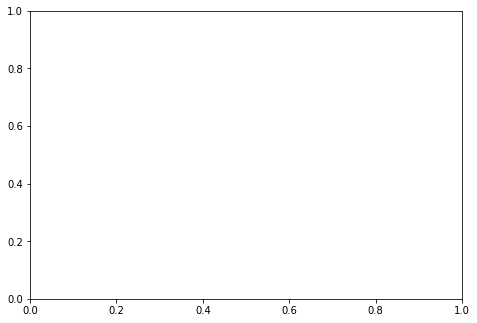

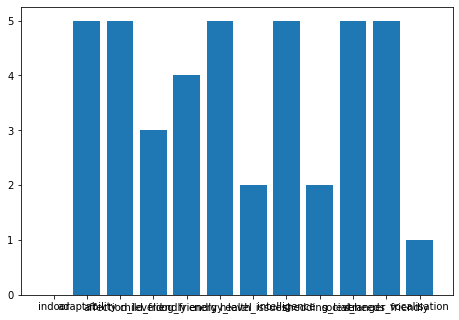

In [17]:
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
xs = ["indoor", "adaptability", "affection_level", "child_friendly", "dog_friendly", "energy_level", "health_issues", "intelligence", "shedding_level", "social_needs", "stranger_friendly", "vocalisation"]
ys = [0.0, 5.0, 5.0, 3.0, 4.0, 5.0, 2.0, 5.0, 2.0, 5.0, 5.0, 1.0]
plt.bar(xs, ys)
plt.savefig("static_img/test2.jpg")
plt.show()


In [10]:
axis.bar(xs, ys)

<BarContainer object of 12 artists>

In [11]:
plt.show()